In [1]:
print("¡Entorno listo para analizar datos, Fede!")

¡Entorno listo para analizar datos, Fede!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual para los gráficos.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Carga de archivo .csv LIMPIO 
df = pd.read_csv("BegInvFINAL12312016_clean.csv")

# Vistazo rápido
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

Filas: 206529, Columnas: 9


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


<Figure size 1000x600 with 0 Axes>

In [15]:
# Info de los precios
print(df['Price'].describe())

count    206529.000000
mean         22.253910
std          70.178964
min           0.000000
25%           9.990000
50%          14.990000
75%          21.990000
max       13999.900000
Name: Price, dtype: float64


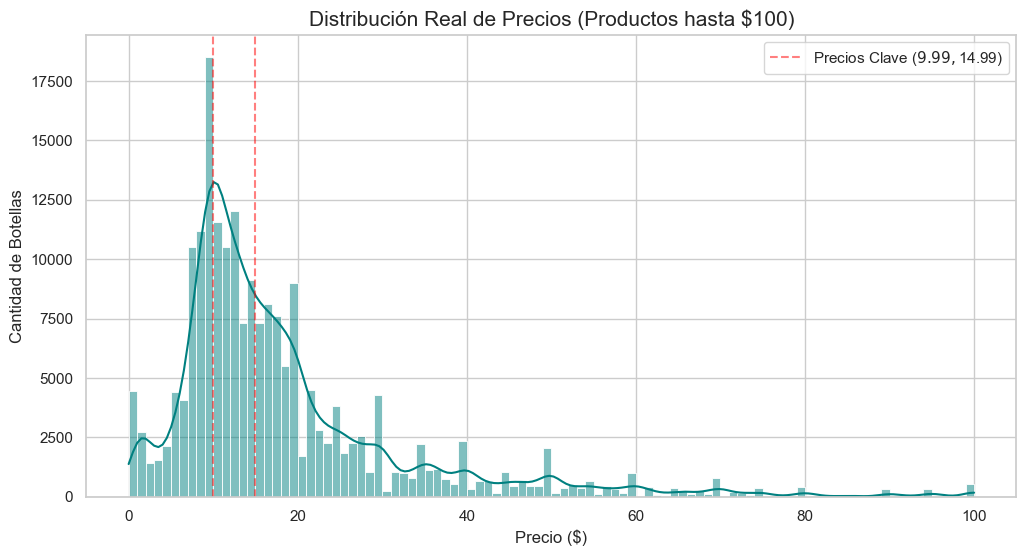

In [22]:
# 1. Nos quedamos solo con precios menores a $100 (por los datos de Info de los precios)

df_zoom = df[df['Price'] <= 100]

plt.figure(figsize=(12, 6))

# 2. Graficamos SOLO ese subconjunto
# binwidth=1 significa "una barra por cada dólar". Esto nos da mucho detalle.
sns.histplot(data=df_zoom, x='Price', binwidth=1, kde=True, color='teal')

plt.title('Distribución Real de Precios (Productos hasta $100)', fontsize=15)
plt.xlabel('Precio ($)')
plt.ylabel('Cantidad de Botellas')

# Marcamos los hitos estadísticos
plt.axvline(9.99, color='red', linestyle='--', alpha=0.5, label='Precios Clave ($9.99, $14.99)')
plt.axvline(14.99, color='red', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [20]:
# 1. Contamos los de Precio 0
ceros = df[df['Price'] == 0]
cantidad = ceros.shape[0]
total = df.shape[0]

print(f"🔎 Productos de Precios Cero:")
print(f"Cantidad de productos: {cantidad}")
print(f"Porcentaje del inventario: {cantidad / total:.2%}")

# 2. ¿Quiénes son? (Veamos los primeros 5 culpables)
if cantidad > 0:
    print("\n--- Top 5 Sospechosos ---")
    # Mostramos Marca, Descripción y en qué tienda están
    print(ceros[['Brand', 'Description', 'Store', 'onHand']].head())
else:
    print("\n No hay productos con precio 0.")

🔎 Productos de Precios Cero:
Cantidad de productos: 2
Porcentaje del inventario: 0.00%

--- Top 5 Sospechosos ---
        Brand                   Description  Store  onHand
36829   19138  Gerard Bertrand Organic Rose     15       0
175458  19138  Gerard Bertrand Organic Rose     69       2


In [23]:
# ¿Qué porcentaje exacto del inventario cuesta menos de 20 dólares?
porcentaje_barato = (df['Price'] <= 19.99).mean() * 100

print(f"El {porcentaje_barato:.2f}% de tus productos cuestan menos de $20.")

El 72.19% de tus productos cuestan menos de $20.


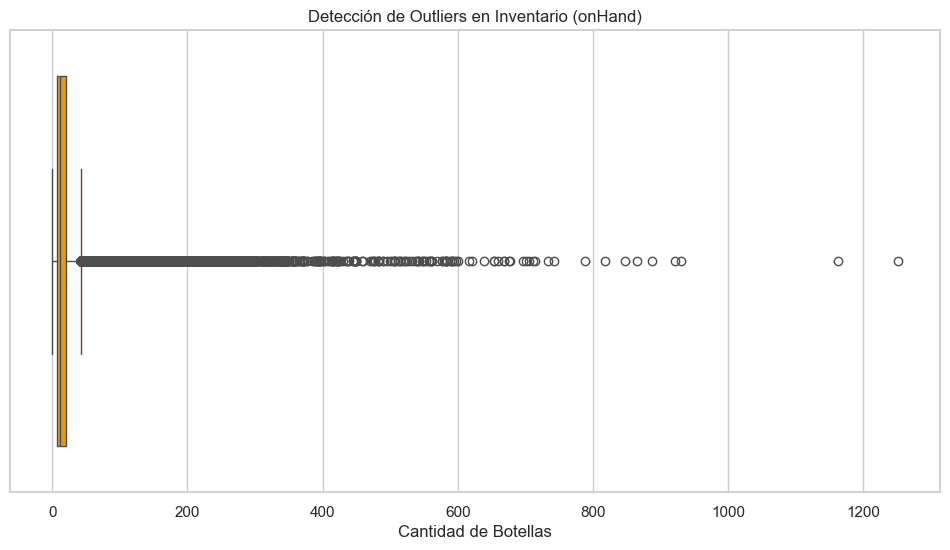

--- Top 5 Registros con más stock ---
        Store  Brand              Description  onHand
173397     69   3858         Grey Goose Vodka    1251
204102     79   3859        Smirnoff 80 Proof    1163
79437      34   3876        Smirnoff 80 Proof     930
157944     65   7341      Smirnoff Watermelon     921
78556      34   1233  Jack Daniels No 7 Black     888


In [ ]:
# ¿Tenemos stock acumulado? (Outliers / Boxplot)
# ¿Hay alguna tienda que tenga una cantidad absurda de botellas (onHand) comparada con las demás?

# Análisis de la variable 'onHand' (Cantidad en mano)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['onHand'], color='orange')
plt.title('Detección de Outliers en Inventario (onHand)')
plt.xlabel('Cantidad de Botellas')
plt.show()

# Ver quiénes son esos casos extremos (Top 5 con más stock)
print("--- Top 5 Registros con más stock ---")
print(df.nlargest(5, 'onHand')[['Store', 'Brand', 'Description', 'onHand']])

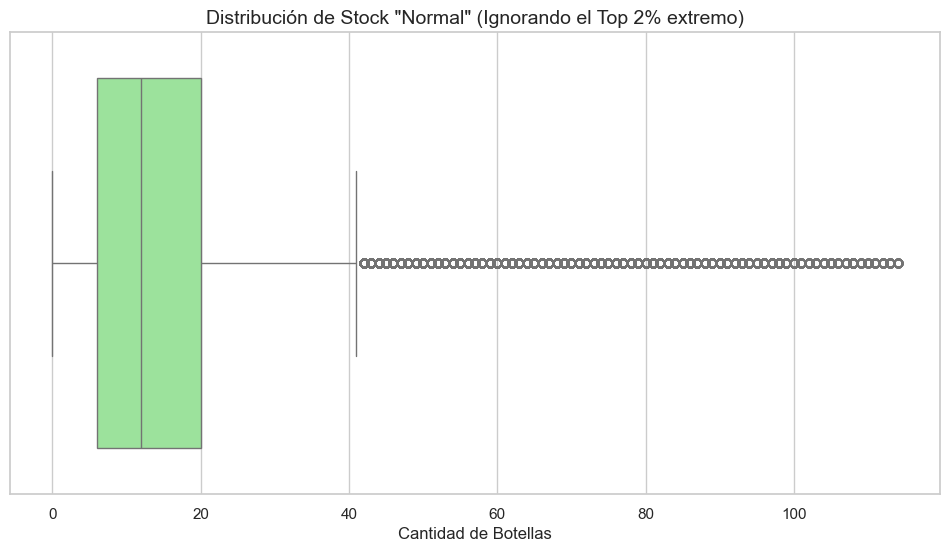

In [27]:
# Ahora repito pero ingnorando el top 2% extremo:

# Configuración del lienzo
plt.figure(figsize=(12, 6))

# 1. Calculamos el límite "normal" (El percentil 98)
# Esto significa: "Muéstrame hasta donde llega el 98% de la gente"
limite_normal = df['onHand'].quantile(0.98)

# 2. Graficamos SOLO los datos normales (filtro temporal)
datos_normales = df[df['onHand'] < limite_normal]
sns.boxplot(x=datos_normales['onHand'], color='lightgreen')

plt.title(f'Distribución de Stock "Normal" (Ignorando el Top 2% extremo)', fontsize=14)
plt.xlabel('Cantidad de Botellas')
plt.show()



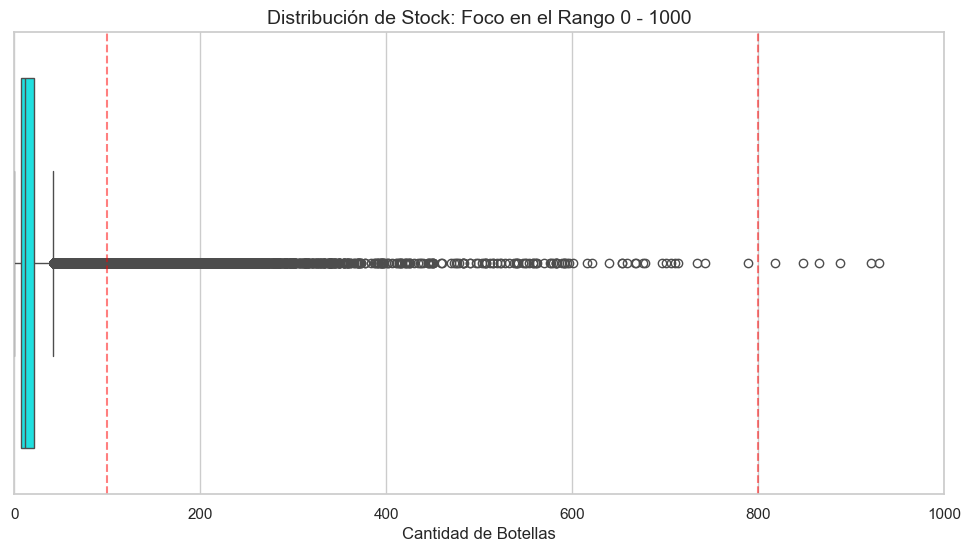

Cantidad de registros en este rango: 5552
--- Top 10 Productos con Stock Alto (Ordenados por Precio) ---
        Brand                   Description  Price  onHand
172755   2208      WhistlePig 10 Yr Old Rye  74.99     194
163900   2208      WhistlePig 10 Yr Old Rye  74.99     180
78785    2208      WhistlePig 10 Yr Old Rye  74.99     184
194957   2208      WhistlePig 10 Yr Old Rye  74.99     158
158927   2208      WhistlePig 10 Yr Old Rye  74.99     185
143984   2208      WhistlePig 10 Yr Old Rye  74.99     136
89761    2208      WhistlePig 10 Yr Old Rye  74.99     158
185332   2208      WhistlePig 10 Yr Old Rye  74.99     158
177570  44547  Silver Oak Cab Svgn Alex Vly  69.99     134
79029    2874  Hirsch 20 Yr American Whisky  69.99     133


In [32]:
# "Sector Mayorista" o los "Productos de Alta Rotación"
# Tiendas con 100 a 800 botellas

plt.figure(figsize=(12, 6))

# Boxplot restringido visualmente
sns.boxplot(x=df['onHand'], color='cyan')

# AQUÍ ESTÁ LA CLAVE: Le decimos a Python "Solo muéstrame el escenario de 0 a 1000"
# Aunque existan datos mayores, los corta de la foto para que veamos bien el grueso.
plt.xlim(0, 1000)

plt.title('Distribución de Stock: Foco en el Rango 0 - 1000', fontsize=14)
plt.xlabel('Cantidad de Botellas')

# Vamos a dibujar líneas verticales para marcar el rango que viste
plt.axvline(100, color='red', linestyle='--', alpha=0.5)
plt.axvline(800, color='red', linestyle='--', alpha=0.5)

plt.show()

# Y ahora, ¿QUIÉNES SON esos de 100 a 800?
rango_interesante = df[(df['onHand'] >= 100) & (df['onHand'] <= 800)]
print(f"Cantidad de registros en este rango: {len(rango_interesante)}")

# Ordenamos por PRECIO (de más caro a más barato) para ver dónde hay más riesgo
print("--- Top 10 Productos con Stock Alto (Ordenados por Precio) ---")
print(rango_interesante.sort_values(by='Price', ascending=False)[['Brand', 'Description', 'Price', 'onHand']].head(10))

In [33]:
# Precio promedio de los casos extremos (tiendas con más de 600 botellas de un tipo)

# Hay algún "infiltrado" caro (el precio máximo)?

# Cuáles son los 5 productos más caros de ese grupo?

# 1. Filtramos: Solo los que tienen más de 600 botellas
gigantes = df[df['onHand'] > 600]

print(f"--- Análisis de Precios para Stock > 600 unidades ({len(gigantes)} casos) ---")

# 2. Estadísticas rápidas
# Esto te dirá el precio promedio (mean) y el máximo (max)
print(gigantes['Price'].describe())

print("\n" + "="*40 + "\n")

# 3. ¿Hay algo caro aquí? (Top 5 más caros del grupo)
print("--- Los 5 productos MÁS CAROS con stock masivo ---")
print(gigantes.sort_values(by='Price', ascending=False)[['Brand', 'Description', 'Price', 'onHand']].head(5))

--- Análisis de Precios para Stock > 600 unidades (27 casos) ---
count    27.000000
mean     21.394444
std      10.035220
min       0.990000
25%      18.490000
50%      23.990000
75%      27.490000
max      35.990000
Name: Price, dtype: float64


--- Los 5 productos MÁS CAROS con stock masivo ---
        Brand              Description  Price  onHand
78556    1233  Jack Daniels No 7 Black  35.99     888
79283    3545          Ketel One Vodka  31.99     711
159418   3545          Ketel One Vodka  31.99     696
185813   3545          Ketel One Vodka  31.99     654
195432   3545          Ketel One Vodka  31.99     676


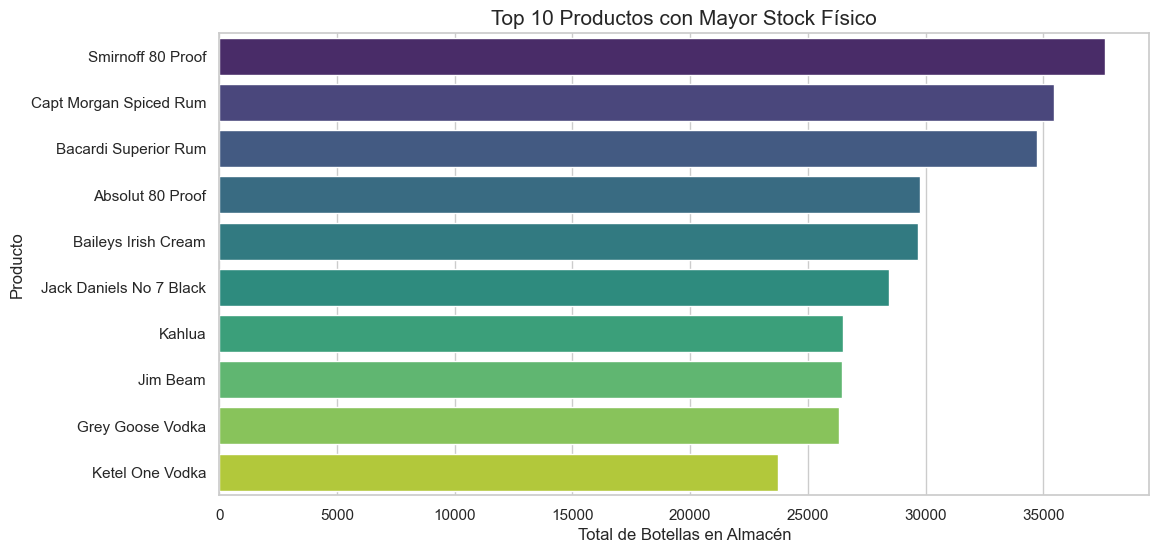

--- Ranking de Stock ---
Smirnoff 80 Proof: 37621 unidades
Capt Morgan Spiced Rum: 35440 unidades
Bacardi Superior Rum: 34717 unidades
Absolut 80 Proof: 29746 unidades
Baileys Irish Cream: 29665 unidades
Jack Daniels No 7 Black: 28469 unidades
Kahlua: 26473 unidades
Jim Beam: 26465 unidades
Grey Goose Vodka: 26313 unidades
Ketel One Vodka: 23738 unidades


In [ ]:
# 1. Agrupamos por DESCRIPCIÓN (Nombre real) en lugar de ID de Marca
# Así sabremos qué botella es, no solo su código numérico
top_productos = df.groupby('Description')['onHand'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))


# - Eje Y: Usamos los nombres (index)
# - Eje X: Usamos las cantidades (values)
# - hue: Asignamos los nombres al color también (para que pinte cada barra distinto)
# - legend=False: Para que no ensucie el gráfico con una leyenda repetida
sns.barplot(x=top_productos.values, y=top_productos.index, hue=top_productos.index, palette="viridis", legend=False)

plt.title('Top 10 Productos con Mayor Stock Físico', fontsize=15)
plt.xlabel('Total de Botellas en Almacén')
plt.ylabel('Producto')

plt.show()

# Tabla de posiciones textual
print("--- Ranking de Stock ---")
for producto, cantidad in top_productos.items():
    print(f"{producto}: {cantidad} unidades")